<a href="https://colab.research.google.com/github/19rehan/Stroke-Prediction---Machine-Learning/blob/main/Stroke_Prediction_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from collections import Counter

In [11]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [12]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
bmi_gender_column = df[['gender','bmi']]
bmi_gender_column

,gender,bmi
0,Male,36.6
1,Female,NaN
2,Male,32.5
3,Female,34.4
4,Female,24.0
...,...,...
5105,Female,NaN
5106,Female,40.0
5107,Female,30.6
5108,Male,25.6


In [16]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [17]:
bmi_gender_column = df[df['bmi'].isnull()][['bmi','gender']]
bmi_gender_column

,bmi,gender
1,NaN,Female
8,NaN,Female
13,NaN,Male
19,NaN,Male
27,NaN,Male
...,...,...
5039,NaN,Male
5048,NaN,Male
5093,NaN,Female
5099,NaN,Male


In [18]:
df['bmi'] = df['bmi'].fillna(df.groupby('gender')['bmi'].transform('mean'))

In [19]:
age_married  = df[['age','ever_married']]
age_married

,age,ever_married
0,67.0,Yes
1,61.0,Yes
2,80.0,Yes
3,49.0,Yes
4,79.0,Yes
...,...,...
5105,80.0,Yes
5106,81.0,Yes
5107,35.0,Yes
5108,51.0,Yes


In [20]:
print(df['age'].min())

0.08


In [21]:
under_age = df[df['age'] < 10]['smoking_status']
print(under_age.value_counts())

smoking_status
Unknown    472
Name: count, dtype: int64


In [22]:
df.loc[(df['age'] < 10) & (df['smoking_status'] == 'Unknown'), 'smoking_status'] = 'never smoked'

In [23]:
df[df['age']<10]['smoking_status'].value_counts()

,count
smoking_status,
never smoked,472


In [24]:
df = df.drop(columns=['id'])

In [25]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,29.065758,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


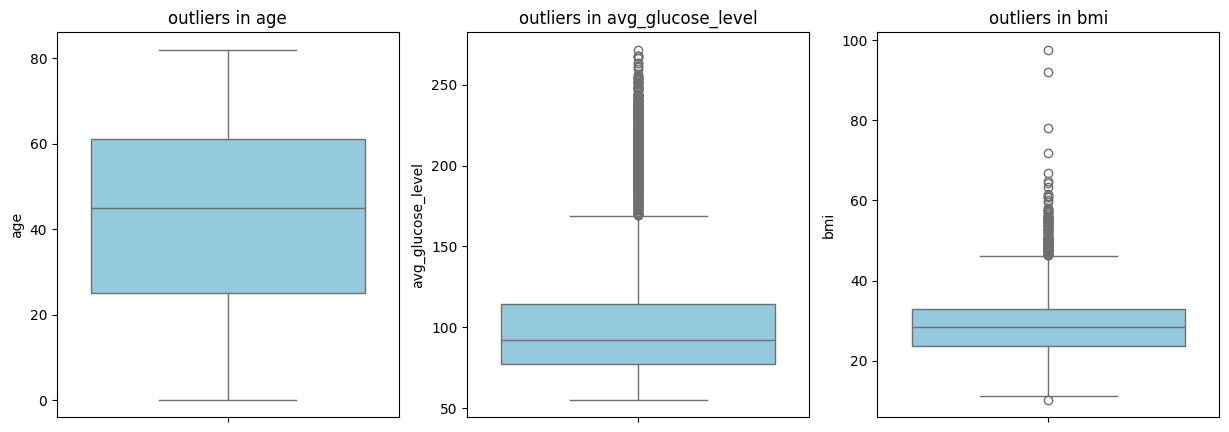

In [26]:
chk_outliers = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize = (15,5))

for i, col in enumerate(chk_outliers):
  plt.subplot(1,3,i+1)
  sns.boxplot(y =df[col], color = 'skyblue')
  plt.title(f'outliers in {col}')

plt.tight_layout
plt.show()

In [27]:
checking_bmi = df['bmi']>50
checking_bmi.value_counts()

,count
bmi,
False,5031
True,79


In [28]:
df = df[df['bmi']<=60]

In [29]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,29.065758,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [30]:
print(f'the outliers are {len(df[df['bmi']>60])}')

the outliers are 0


In [31]:
 p  = df['avg_glucose_level'].value_counts(normalize=True)*100
 print(p)

avg_glucose_level
93.88     0.117716
73.00     0.098097
72.49     0.098097
91.85     0.098097
91.68     0.098097
            ...   
76.15     0.019619
58.57     0.019619
219.84    0.019619
214.09    0.019619
167.41    0.019619
Name: proportion, Length: 3968, dtype: float64


In [32]:
df['avg_glucose_level'].describe()

,avg_glucose_level
count,5097.000000
mean,106.159892
std,45.284811
min,55.120000
25%,77.280000
50%,91.890000
75%,114.090000
max,271.740000


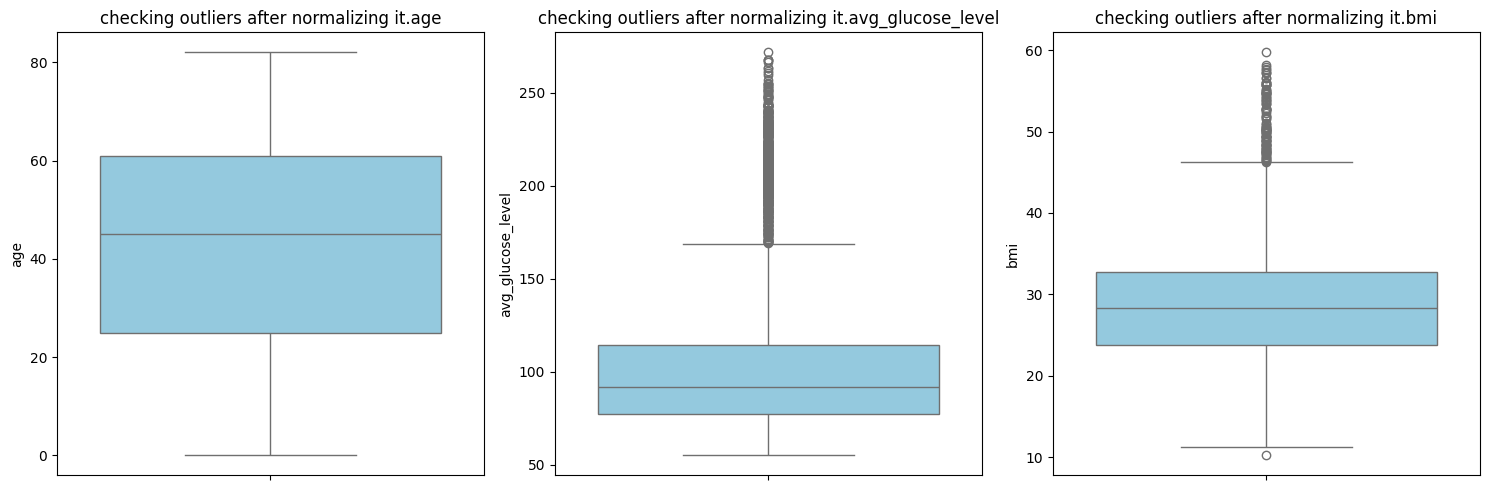

In [33]:
chking_outliers = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15,5))

for i , col in enumerate(chking_outliers):
  plt.subplot(1,3,i+1)
  sns.boxplot(y =df[col], color = 'skyblue')
  plt.title(f"checking outliers after normalizing it.{col}")

plt.tight_layout()
plt.show()

In [34]:
df = df[(df['bmi']>=15) & (df['bmi']<= 60)]

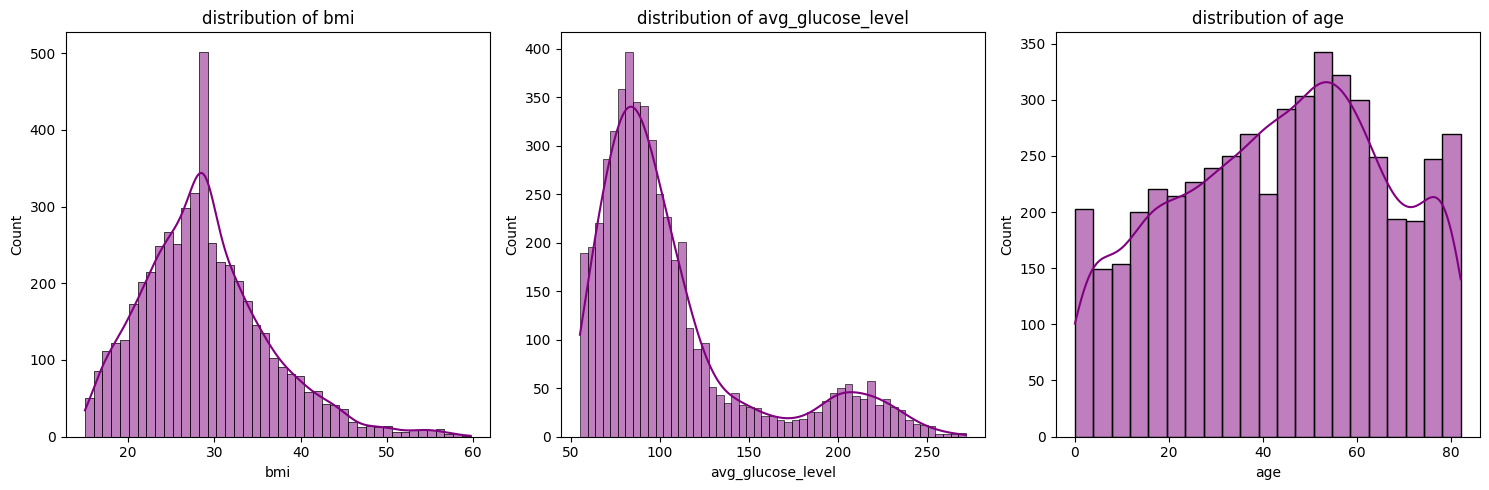

skewness score :
bmi                  0.768093
avg_glucose_level    1.568935
age                 -0.140148
dtype: float64


In [35]:
data_distribution  = ['bmi' ,'avg_glucose_level','age']

plt.figure(figsize = (15,5))

for i , col in enumerate(data_distribution):
  plt.subplot(1,3,i+1)
  sns.histplot(df[col], kde = True , color = 'purple')
  plt.title(f"distribution of {col}")

plt.tight_layout()
plt.show()


print('skewness score :')
print(df[data_distribution].skew())

In [36]:
df['glocus_log'] = np.log(df['avg_glucose_level'])

print(f"Original Skewness: {df['avg_glucose_level'].skew():.2f}")
print(f"Transformed Skewness: {df['glocus_log'].skew():.2f}")

Original Skewness: 1.57
Transformed Skewness: 0.88


/tmp/ipython-input-17979195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['glocus_log'] = np.log(df['avg_glucose_level'])


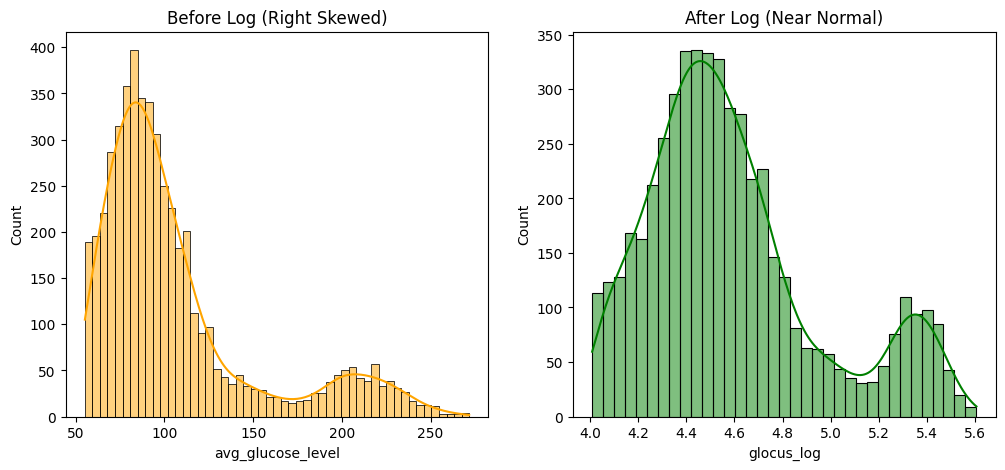

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['avg_glucose_level'], kde=True, color='orange')
plt.title('Before Log (Right Skewed)')

plt.subplot(1, 2, 2)
sns.histplot(df['glocus_log'], kde=True, color='green')
plt.title('After Log (Near Normal)')
plt.show()

In [38]:
df.drop(columns = ['avg_glucose_level'], inplace = True)

/tmp/ipython-input-462013376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['avg_glucose_level'], inplace = True)


In [39]:
df['stroke'].value_counts(normalize=True)*100

,proportion
stroke,
0,95.074184
1,4.925816


/tmp/ipython-input-2143908064.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['stroke'], palette = 'viridis')


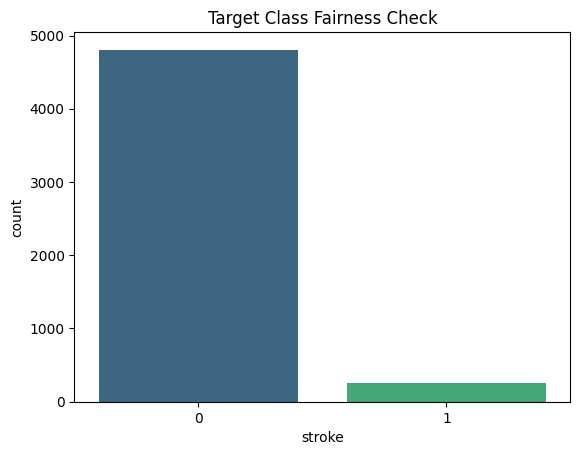

In [40]:
sns.countplot(x = df['stroke'], palette = 'viridis')
plt.title('Target Class Fairness Check')
plt.show()

In [41]:
df_final = pd.get_dummies(df, drop_first=True)


x = df_final.drop('stroke', axis = 1)
y = df_final['stroke']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
smote = SMOTE(sampling_strategy = 'minority', random_state = 42)
x_resampled , y_resampled = smote.fit_resample(X_train,y_train)


print(f"Original shape: {Counter(y)}")
print(f"Resampled shape: {Counter(y_resampled)}")

Original shape: Counter({0: 4806, 1: 249})
Resampled shape: Counter({0: 3858, 1: 3858})


In [49]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

print("--- Detailed Percentage Breakdown ---")

for col in categorical_cols:
    print(f"\nColumn: {col.upper()}")
    # Har category ka percentage nikalna
    percentage = df[col].value_counts(normalize=True) * 100
    print(percentage.map('{:.2f}%'.format))
    print("-" * 30)

--- Detailed Percentage Breakdown ---

Column: GENDER
gender
Female    58.59%
Male      41.41%
Name: proportion, dtype: object
------------------------------

Column: EVER_MARRIED
ever_married
Yes    66.32%
No     33.68%
Name: proportion, dtype: object
------------------------------

Column: WORK_TYPE
work_type
Private          57.80%
Self-employed    16.23%
Govt_job         13.05%
children         12.91%
Name: proportion, dtype: object
------------------------------

Column: RESIDENCE_TYPE
Residence_type
Urban    50.69%
Rural    49.31%
Name: proportion, dtype: object
------------------------------

Column: SMOKING_STATUS
smoking_status
never smoked       45.92%
Unknown            20.92%
formerly smoked    17.56%
smokes             15.60%
Name: proportion, dtype: object
------------------------------


In [48]:
df = df[df['gender'] != 'Other']
df = df[df['work_type'] != 'Never_worked']

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5033 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5033 non-null   object 
 1   age             5033 non-null   float64
 2   hypertension    5033 non-null   int64  
 3   heart_disease   5033 non-null   int64  
 4   ever_married    5033 non-null   object 
 5   work_type       5033 non-null   object 
 6   Residence_type  5033 non-null   object 
 7   bmi             5033 non-null   float64
 8   smoking_status  5033 non-null   object 
 9   stroke          5033 non-null   int64  
 10  glocus_log      5033 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 471.8+ KB


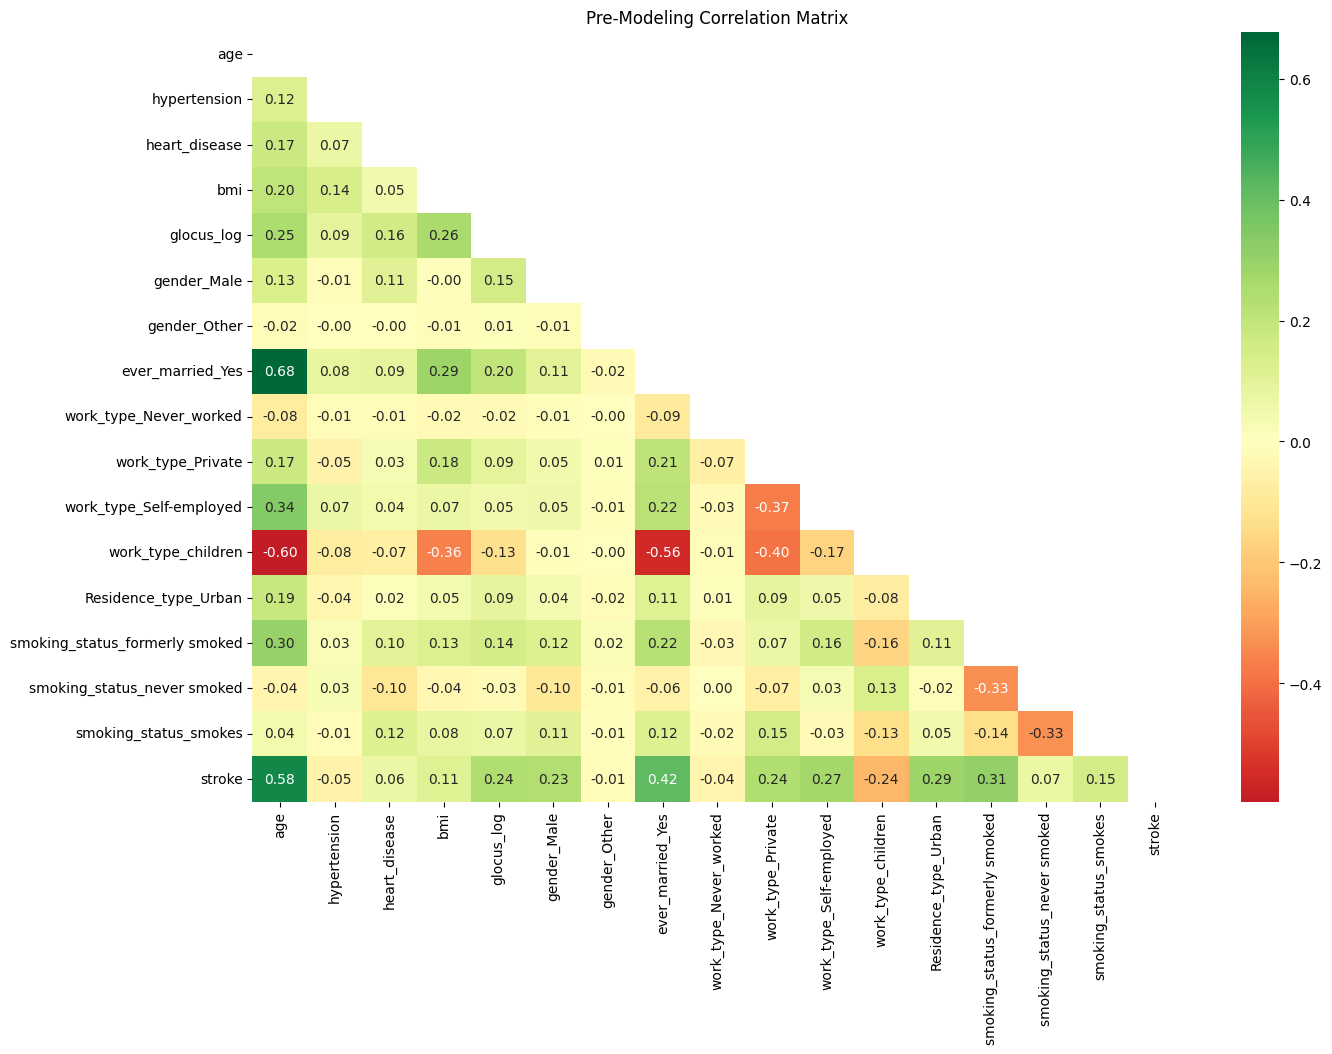

Top factors affecting Stroke:
stroke                            1.000000
age                               0.582281
ever_married_Yes                  0.418247
smoking_status_formerly smoked    0.309078
Residence_type_Urban              0.289310
work_type_Self-employed           0.271594
work_type_Private                 0.242812
glocus_log                        0.239737
gender_Male                       0.232583
smoking_status_smokes             0.147686
bmi                               0.111793
smoking_status_never smoked       0.073357
heart_disease                     0.063544
gender_Other                     -0.011385
work_type_Never_worked           -0.044134
hypertension                     -0.054453
work_type_children               -0.243088
Name: stroke, dtype: float64


In [52]:
import numpy as np

# 1. Sirf X_train_res aur y_train_res ko use karein kyunke model isi par train hoga
temp_df = pd.DataFrame(x_resampled, columns=x.columns)
temp_df['stroke'] = y_resampled
# 2. Correlation Matrix
corr = temp_df.corr()

# 3. Heatmap Visualize karein
plt.figure(figsize=(15, 10))
# Masking the upper triangle for better visibility
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='RdYlGn', center=0)
plt.title("Pre-Modeling Correlation Matrix")
plt.show()

# 4. Top Correlations with Stroke
print("Top factors affecting Stroke:")
print(corr['stroke'].sort_values(ascending=False))

In [58]:
important_columns = [
    'age',
    'glocus_log',
    'bmi',
    'hypertension', # Aapne kaha tha ye rakhna hai boundary par hai
    'heart_disease', # Agar aap ise nikalna chahte hain toh list se hata dein
     'stroke' # Agar aap ne ise drop karne ka faisla kiya hai toh nikal dein # Target column
]

In [59]:
df_final = df[important_columns]

In [60]:
df_final.head()

,age,glocus_log,bmi,hypertension,heart_disease,stroke
0,67.0,5.432367,36.600000,0,1,1
1,61.0,5.309307,29.065758,0,0,1
2,80.0,4.662684,32.500000,0,1,1
3,49.0,5.143008,34.400000,0,0,1
4,79.0,5.159745,24.000000,1,0,1


In [63]:
X = df_final.drop('stroke', axis = 1)
y = df_final['stroke']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

In [66]:
smote = SMOTE(sampling_strategy = 'minority', random_state = 42)
X_train_res , y_train_res = smote.fit_resample(X_train,y_train)

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_scaled = sc.fit_transform(X_train_res)
x_test_scaled = sc.transform(X_test)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
lr = LogisticRegression()
lr.fit(x_scaled, y_train_res)
y_prd_lr = lr.predict(x_test_scaled)

In [75]:
rf = RandomForestClassifier()
rf.fit(x_scaled, y_train_res)
y_pred_rf = rf.predict(x_test_scaled)

In [78]:
print("--- Logistic Regression Report ---")
print(classification_report(y_test, y_prd_lr))

print("--- Random Forest Report ---")
print(classification_report(y_test, y_pred_rf))

--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       946
           1       0.16      0.75      0.27        61

    accuracy                           0.75      1007
   macro avg       0.57      0.75      0.56      1007
weighted avg       0.93      0.75      0.81      1007

--- Random Forest Report ---
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       946
           1       0.15      0.26      0.19        61

    accuracy                           0.86      1007
   macro avg       0.55      0.58      0.56      1007
weighted avg       0.90      0.86      0.88      1007



In [80]:
y_probs = lr.predict_proba(x_test_scaled)[:, 1]


custom_threshold = 0.3
y_pred_new = (y_probs >= custom_threshold).astype(int)

print(f"--- Report with Threshold: {custom_threshold} ---")
print(classification_report(y_test, y_pred_new))

--- Report with Threshold: 0.3 ---
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       946
           1       0.12      0.90      0.22        61

    accuracy                           0.61      1007
   macro avg       0.56      0.74      0.48      1007
weighted avg       0.94      0.61      0.71      1007

